## Wine Quality Dataset

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Display all the columns and rows
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
# Loading the dataset
df = pd.read_csv('G:\MS Avishkara\winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Checking the shape of the dataset
print("There are {} observation and {} features in our dataset.\n".format(df.shape[0],df.shape[1]))

There are 1599 observation and 12 features in our dataset.



In [5]:
# Checking the information of the dataset
print("The information of the dataset is given below:\n")
df.info()

The information of the dataset is given below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


A quick overview tells us that the data contains 11 features that lead to a classification of the redwine quality (12th column). We have 1599 instances that we can train and test the model on. There is no null values in our dataset.

In [6]:
#Checking for the missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

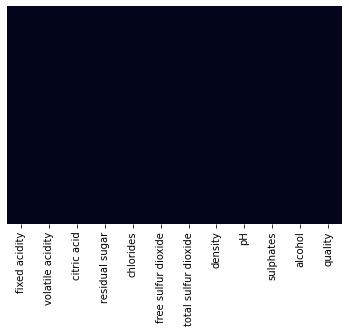

In [7]:
#Seeing the null value via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

The result shows that there is no null value in the data which means further missing data treatment is not required.

## Summary Statistics

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observation: In this section we see the statistical distribution of the features.
   
   1-Highest quality is 8 and lowest quality is 3.
   
   2-In residual sugar,free sulfer dioxide and total sulfer dioxide columns difference between 75% and maximum is little bit 
    higher so outliers may be predent in these columns.

In [9]:
#Checking the number wine quality present in our dataset.
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
#Checking the number of wine quality present in percentage wise.
df['quality'].value_counts(normalize=True) *100

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

## Checking the Correlation

In [11]:
df_corr= df.corr()
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).

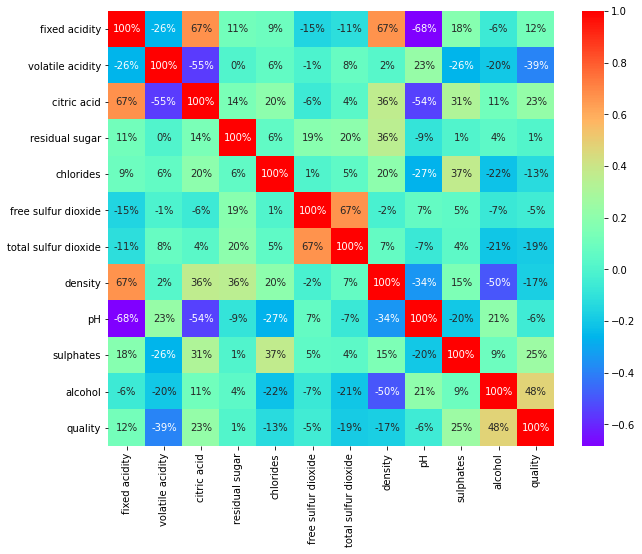

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,fmt='.0%',cmap='rainbow')
plt.show()

The heatmap gives us a first guess which features could be higher correlated. It shows an increased linear correlation for following pairs:

"free sulfur dioxide" and "total sulfur dioxide"

"fixed acidity" and "citric acid"

"fixed acidity" and "density"

I consider features being highly correlated if the correlation is > 0.9

By looking at the specific linear correlation values non of the identified pairs have a correlation above 0.9.

## Data Visualization

Text(0.5, 1.0, 'Correlation with target Variable')

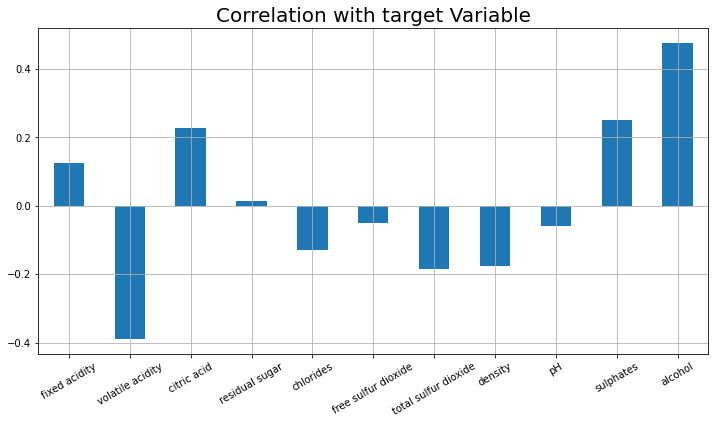

In [13]:
# Checking the correlation with the target variable i.e. quality

plt.figure(figsize=(12,6))
df.drop('quality',axis=1).corrwith(df['quality']).plot(kind='bar',grid=True)
plt.xticks(rotation=30)
plt.title("Correlation with target Variable",fontsize=20)

Observation: fixed acidity, citric acid, sulphates, alcohol is positively correlated with target features.

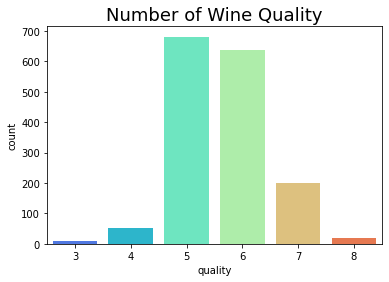

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [14]:
#Counting of wine quality present in our dataset

sns.countplot(df['quality'],palette= 'rainbow')
plt.title("Number of Wine Quality",fontsize=18)
plt.show()

print(df.quality.value_counts())

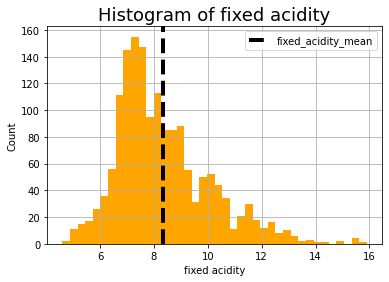

In [15]:
#Histogram of Fixed acidity with its mean value
fixed_acidity = df['fixed acidity'].hist(bins=40,stacked=True,color='orange',histtype='barstacked')
mean_val = np.mean(df['fixed acidity'])
plt.axvline(mean_val, linewidth=4, color='black', label='fixed_acidity_mean', linestyle='dashed')
plt.xlabel('fixed acidity')
plt.ylabel('Count')
plt.title('Histogram of fixed acidity',fontsize=18)
plt.legend()
plt.show()

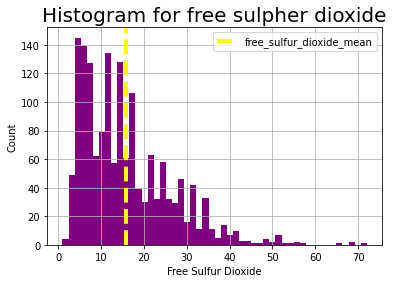

In [16]:
#Histogram of Free Sulpher dioxide with its mean value
free_sul_dioxide = df['free sulfur dioxide'].hist(bins=50,stacked=True,color='purple',histtype='barstacked')
mean_val = np.mean(df['free sulfur dioxide'])
plt.axvline(mean_val, linewidth=4, color='yellow', label='free_sulfur_dioxide_mean', linestyle='dashed')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Count')
plt.title('Histogram for free sulpher dioxide',fontsize=20)
plt.legend()
plt.show()

Similarly we can see the distribution and it's mean value for others features.

### Ploting the Distribution plot and seeing the skewness of the features

**********************************************************
Distribution and Skewness for: fixed acidity
Skewness for fixed acidity is: 0.9827514413284587


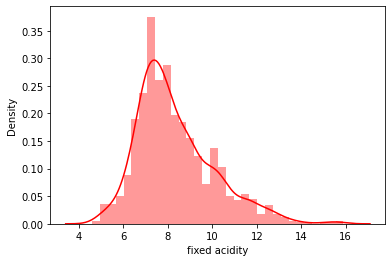

**********************************************************
Distribution and Skewness for: volatile acidity
Skewness for volatile acidity is: 0.6715925723840199


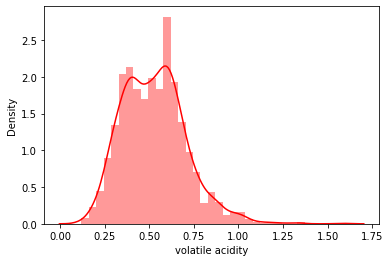

**********************************************************
Distribution and Skewness for: citric acid
Skewness for citric acid is: 0.3183372952546368


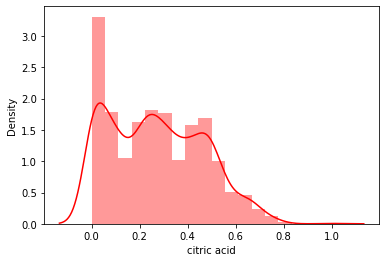

**********************************************************
Distribution and Skewness for: residual sugar
Skewness for residual sugar is: 4.54065542590319


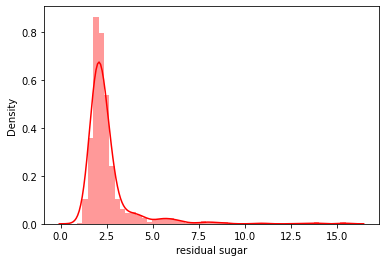

**********************************************************
Distribution and Skewness for: chlorides
Skewness for chlorides is: 5.680346571971722


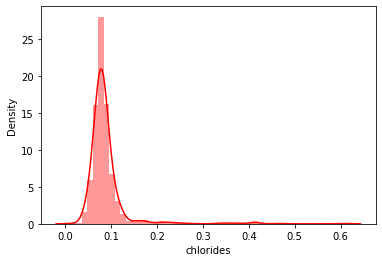

**********************************************************
Distribution and Skewness for: free sulfur dioxide
Skewness for free sulfur dioxide is: 1.250567293314441


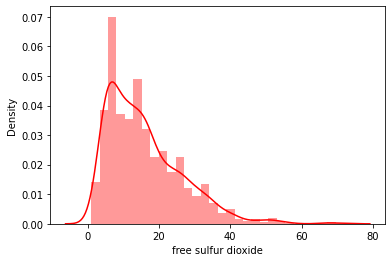

**********************************************************
Distribution and Skewness for: total sulfur dioxide
Skewness for total sulfur dioxide is: 1.515531257594554


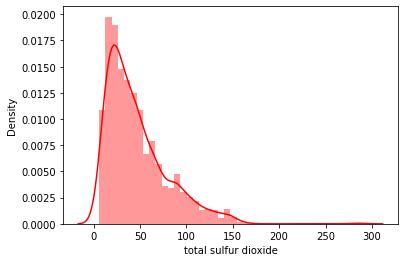

**********************************************************
Distribution and Skewness for: density
Skewness for density is: 0.07128766294945525


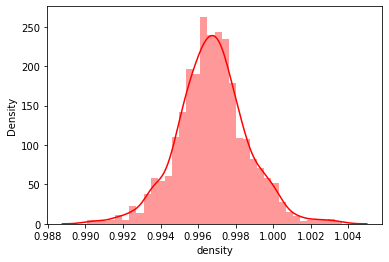

**********************************************************
Distribution and Skewness for: pH
Skewness for pH is: 0.19368349811284427


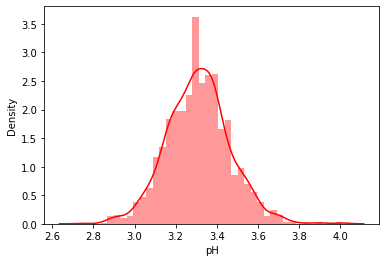

**********************************************************
Distribution and Skewness for: sulphates
Skewness for sulphates is: 2.4286723536602945


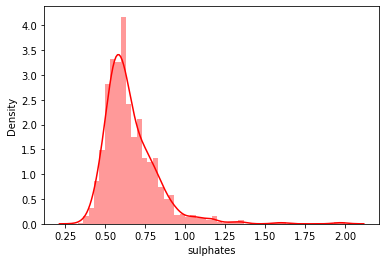

**********************************************************
Distribution and Skewness for: alcohol
Skewness for alcohol is: 0.8608288068888538


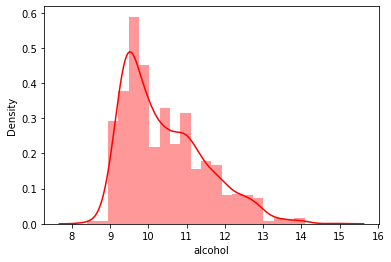

In [17]:
features = df.drop(columns=['quality'])
    
for i in features:
    print("**********************************************************")
    print("Distribution and Skewness for:",i)
    sns.distplot(df[i],color='r')
    print("Skewness for",i,"is:",df[i].skew())
    plt.show()

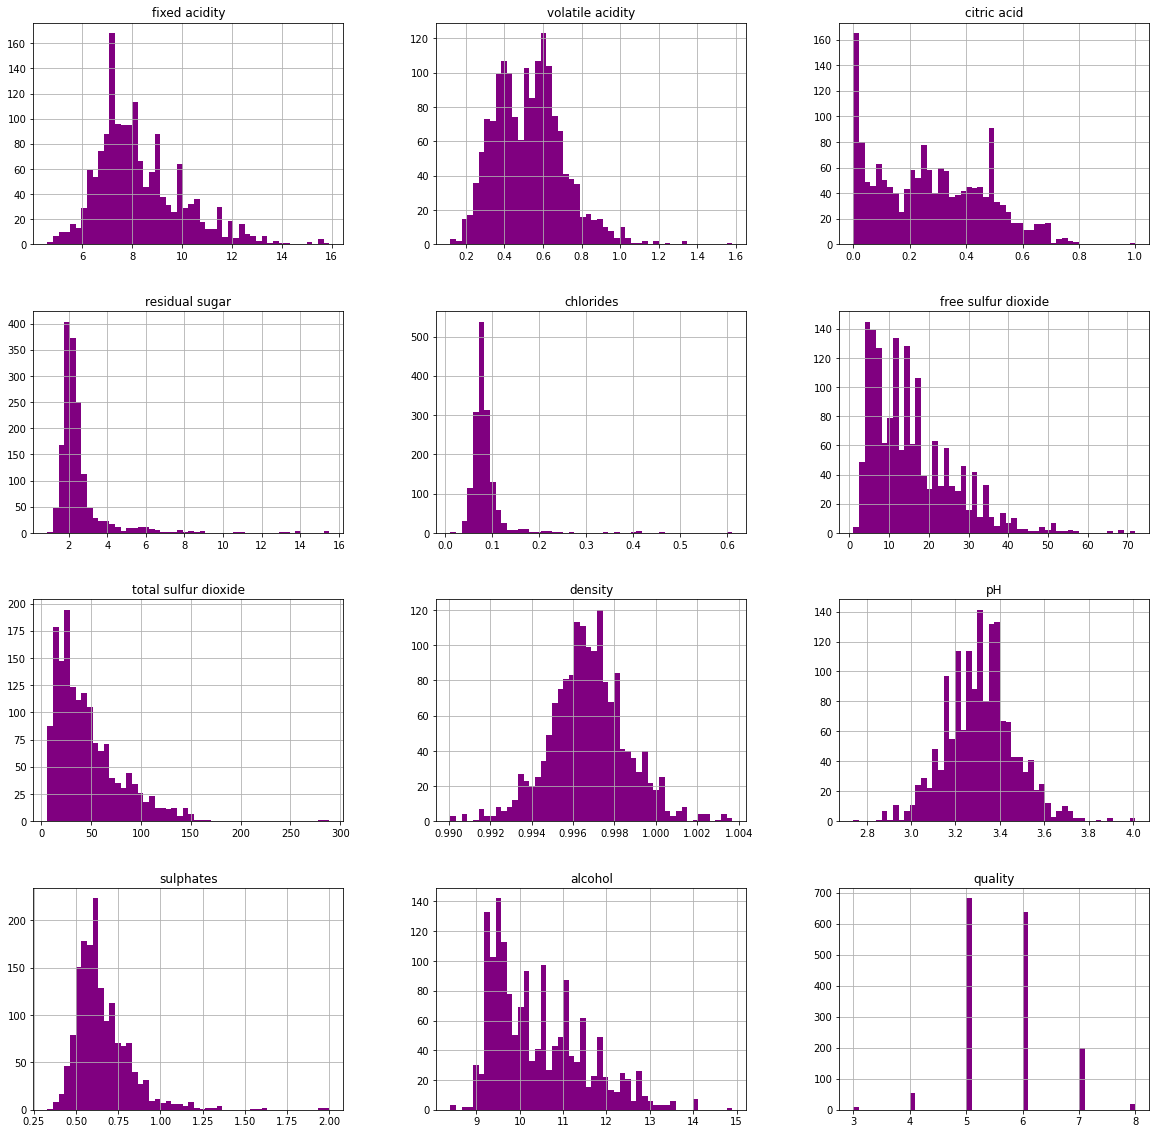

In [18]:
#Plotting the histogram
df.hist(bins=50,figsize=(20,20),color='purple')
plt.show()

#### Findings: Some of the columns are skewed which needs to be treated.

## Bivariate Analysis

#### Citric acid vs Quality

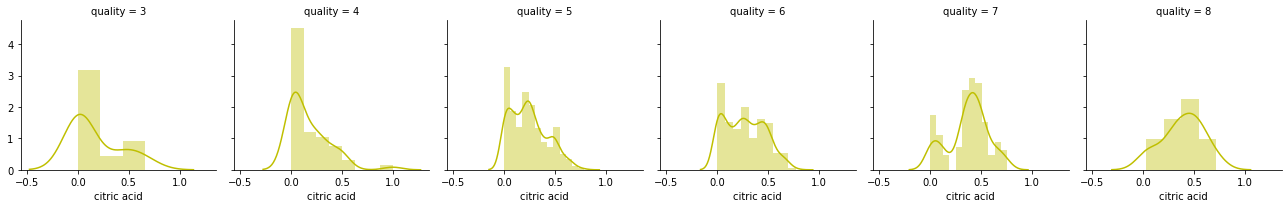

In [19]:
# Exploring citric acid vs quality via FaceGrid
facet = sns.FacetGrid(df, col='quality')
facet.map(sns.distplot, "citric acid",color='y')
plt.show()

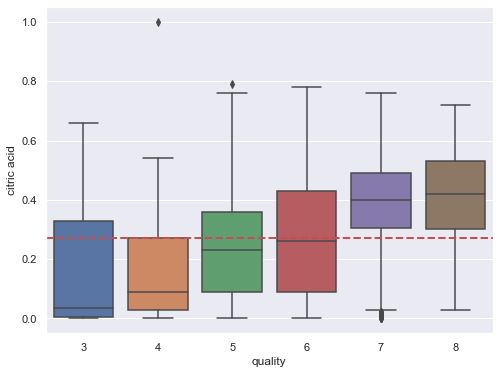

In [20]:
sns.set()
plt.subplots(figsize=(8,6))
citric_acid_mean = df['citric acid'].mean()
sns.boxplot(x='quality',y='citric acid', data=df)
plt.axhline(citric_acid_mean, color='r', linestyle='dashed',linewidth=2)

#### Free Sulfur dioxide vs Quality

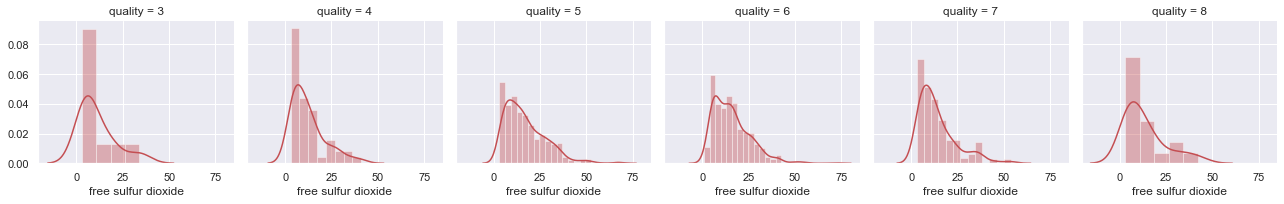

In [21]:
# Exploring free sulpher dioxide vs quality via FaceGrid
facet = sns.FacetGrid(df, col='quality')
facet.map(sns.distplot, "free sulfur dioxide",color='r')
plt.show()

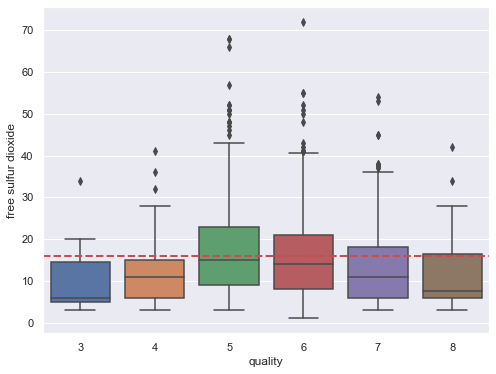

In [22]:
sns.set()
plt.subplots(figsize=(8,6))
free_sulfur_dioxide_mean = df['free sulfur dioxide'].mean()
sns.boxplot(x='quality',y='free sulfur dioxide', data=df)
plt.axhline(free_sulfur_dioxide_mean, color='r', linestyle='dashed',linewidth=2)

Similarly we can see the distribution of the others features with respect to target features.

### Multivariate Analysis

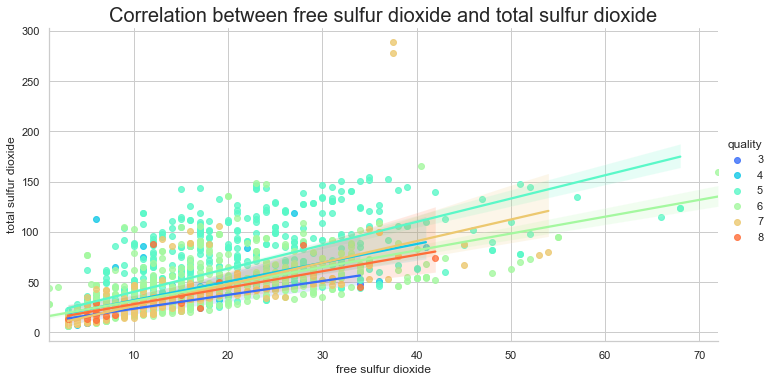

In [23]:
#Correlation between free sulfur dioxide and total sulfur dioxide
sns.set(style='whitegrid')
sns.lmplot(x='free sulfur dioxide',y='total sulfur dioxide',hue='quality',data=df,palette='rainbow',aspect=2)
plt.title('Correlation between free sulfur dioxide and total sulfur dioxide',fontsize=20)
plt.show()

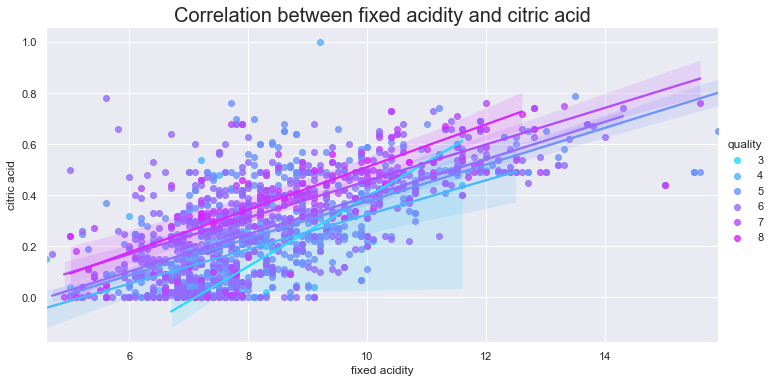

In [24]:
#Correlation between "fixed acidity" and "citric acid"
sns.set(style='darkgrid')
sns.lmplot(x='fixed acidity',y='citric acid',hue='quality',data=df,palette='cool',aspect=2)
plt.title('Correlation between fixed acidity and citric acid',fontsize=20)
plt.show()

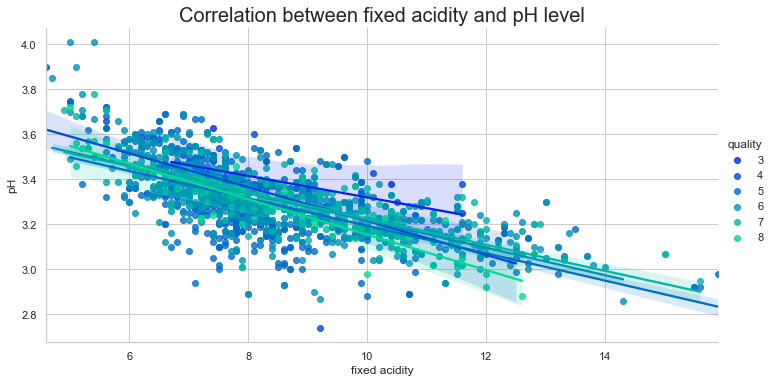

In [25]:
#Correlation between fixed acidity and pH level
sns.set(style='whitegrid')
sns.lmplot(x='fixed acidity',y='pH',hue='quality',data=df,palette='winter',aspect=2)
plt.title('Correlation between fixed acidity and pH level',fontsize=20)
plt.show()

### To Check the skewness

In [26]:
#Checking the skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [27]:
## Treating the Skewness via logmethod
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log(df[col])

## Plotting the Outliers

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

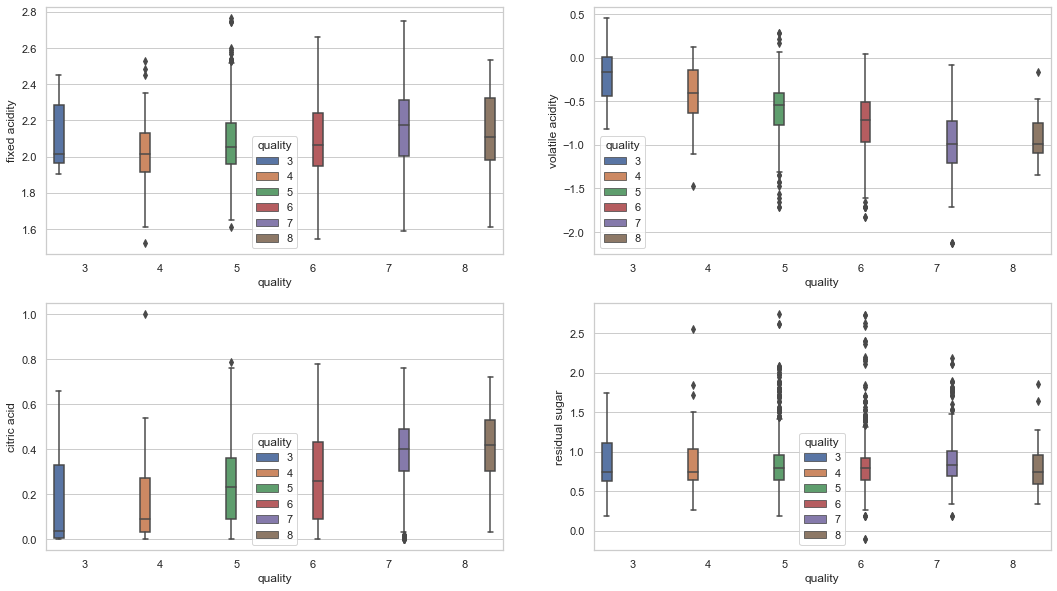

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'quality', y = 'fixed acidity', hue = 'quality', data = df)
sns.boxplot(ax=ax2, x = 'quality', y = 'volatile acidity', hue = 'quality', data = df)
sns.boxplot(ax=ax3, x = 'quality', y = 'citric acid', hue = 'quality', data = df)
sns.boxplot(ax=ax4, x = 'quality', y = 'residual sugar', hue = 'quality', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

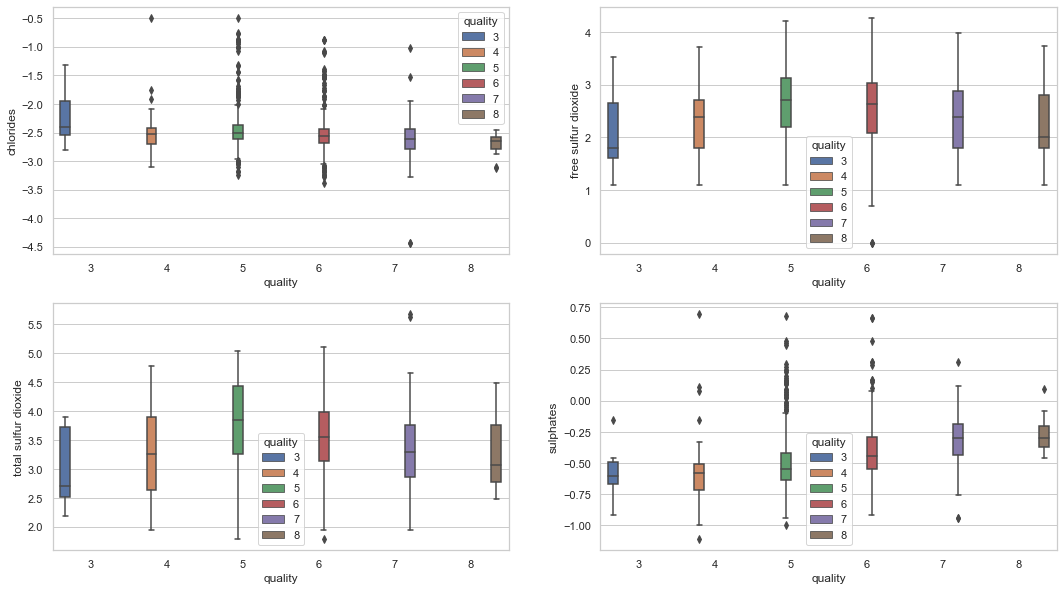

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'quality', y = 'chlorides', hue = 'quality', data = df)
sns.boxplot(ax=ax2, x = 'quality', y = 'free sulfur dioxide', hue = 'quality', data = df)
sns.boxplot(ax=ax3, x = 'quality', y = 'total sulfur dioxide', hue = 'quality', data = df)
sns.boxplot(ax=ax4, x = 'quality', y = 'sulphates', hue = 'quality', data = df)

Observation:
    Free this point of view it is clearly seen that there are some outliers present in our datatset which needs to be removed

## Removing Outliers

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.48530776, 0.96682323, 1.39147228, ..., 0.60206208, 0.9943602 ,
        0.78782264],
       [0.22123048, 1.61405079, 1.39147228, ..., 0.26665831, 0.57286408,
        0.78782264],
       [0.22123048, 1.19941543, 1.18607043, ..., 0.06477406, 0.57286408,
        0.78782264],
       ...,
       [1.29258436, 0.07119357, 0.72391627, ..., 0.70505615, 0.59548446,
        0.45084835],
       [1.62164065, 0.7353852 , 0.77526673, ..., 0.45982537, 0.16823239,
        0.78782264],
       [1.53733094, 1.33683185, 1.02199944, ..., 0.13308595, 0.59548446,
        0.45084835]])

In [32]:
threshold=3
print(np.where(z>3))

(array([  13,   17,   17,   19,   33,   42,   45,   81,   81,   83,   86,
         91,   92,   95,  106,  106,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  226,  226,  240,  243,  244,
        258,  258,  274,  281,  291,  324,  325,  339,  396,  400,  442,
        442,  451,  459,  467,  480,  480,  494,  517,  530,  535,  554,
        554,  555,  555,  557,  557,  566,  567,  568,  588,  595,  608,
        614,  639,  649,  652,  652,  652,  666,  690,  692,  695,  723,
        730,  754,  773,  776,  777,  821,  832,  836,  836,  837,  837,
        889,  899,  911,  917,  923,  948,  949,  950, 1017, 1018, 1043,
       1051, 1051, 1071, 1074, 1079, 1081, 1111, 1114, 1165, 1186, 1235,
       1244, 1260, 1269, 1269, 1270, 1270, 1286, 1299, 1299, 1300, 1316,
       1319, 1319, 1321, 1370, 1372, 1374, 1374, 1434, 1434, 1435, 1435,
       1469, 1474, 1474, 1476, 1476, 1478, 1505, 1558, 1566, 1570, 1574,
       1589], dtype=int64), array([ 9,  4,  9,  4,

In [33]:
df_new = df[(z<3).all(axis=1)]

In [34]:
#Checking the shape
print(df.shape,'\t\t',df_new.shape)

(1599, 12) 		 (1483, 12)


In [35]:
df=df_new
df.shape

(1483, 12)

#### 116 rows are removed that must be our outliers.

## Model Training

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382,5
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382,5
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382,6
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5


In [37]:
#Splitting the data into input and output variable.
x=df.drop(columns=['quality'],axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710


#### Label Binarizaton

In [38]:
#Target Features
y = df['quality'].apply(lambda y_values: 1 if y_values>=7 else 0)

In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [40]:
#Checking the counting of labels
y.value_counts()

0    1283
1     200
Name: quality, dtype: int64

#### It is clearly seen that our label is imbalanced after binning the target features so we have to balanced the target feature.

In [41]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(1483, 11) 		 (1483,)


In [42]:
#Reshaping target features

y=y.values.reshape(-1,1)

In [43]:
#Scaling in input features
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [44]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [67]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(1186, 11) 		 (297, 11)


In [68]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(1186, 1) 	 (297, 1)


### Using Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
#Importing the error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred_train = rf.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=rf.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 1.0

Test accuracy is 0.9124579124579124

[[251   6]
 [ 20  20]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       257
           1       0.77      0.50      0.61        40

    accuracy                           0.91       297
   macro avg       0.85      0.74      0.78       297
weighted avg       0.91      0.91      0.90       297



#### Recall and f1-score is very low for label 1.

### Over Sampling

#### By using the over sampling we are trying to increase the points of minimum labels.

In [88]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': [160]
Before OverSampling, counts of label '0': [1026] 



In [108]:
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 45, k_neighbors=10,n_jobs=-1) 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train) 

In [109]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, counts of label '1': 1026
After OverSampling, counts of label '0': 1026


In [110]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

After OverSampling, the shape of train_X: (2052, 11)
After OverSampling, the shape of train_y: (2052,) 



In [111]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [112]:
y_pred_train = RFclassifier.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=RFclassifier.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 1.0

Test accuracy is 0.9023569023569024

[[236  21]
 [  8  32]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       257
           1       0.60      0.80      0.69        40

    accuracy                           0.90       297
   macro avg       0.79      0.86      0.82       297
weighted avg       0.92      0.90      0.91       297



In [114]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

AUC_Score: 0.8591439688715953


### Model Validation

In [121]:
input_data = (6.6,0.17,0.38,1.5,0.032,28,112,0.9914,3.25,0.55,11.4)

# changing the input data to a numpy array
input_data = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data.reshape(1,-1)

prediction = RFclassifier.predict(input_data_reshaped)
print(prediction)

if (prediction==1):
    print('Wine Quality is Good')
else:
    print('Wine Quality is Bad')

[0]
Wine Quality is Bad


#### We save RandomForest Classifier with oversampled data because it gives good precision and recall value as well as auc score.

### Saving the model

In [116]:
#Saving the model
import joblib

#Save the model as a pickle in a file
wine_model = joblib.dump(RFclassifier,'Wine_Quality_Model.pkl')
wine_model

['Wine_Quality_Model.pkl']